<a href="https://colab.research.google.com/github/heesukjang/W266_NLP_With_DeepLearning/blob/main/Final_Project/EDA_with_Baseline_SimpleBERT_Automated_Essay_Evaluation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Baseline: A Simple Pre-Trained BERT for the Text Classification - Automated 

To set up a BERT model for a classification task using essays as an input, you can follow these general steps:

1. Data preprocessing: Preprocess the essays by tokenizing them into individual words and applying any necessary cleaning or normalization techniques.

2. Data splitting: Split the preprocessed essays into training, validation, and test sets.

3. Model architecture: Choose a pre-trained BERT model (e.g., BERT base, BERT large) and adapt it for your classification task by adding a classification layer on top of the BERT output.

4. Fine-tuning: Fine-tune the pre-trained BERT model on the training set by minimizing a suitable loss function. During fine-tuning, the weights of the BERT model will be updated to better fit the specific classification task.

5. Evaluation: Evaluate the fine-tuned model on the validation set to tune any hyperparameters (e.g., learning rate, number of epochs). After finalizing the hyperparameters, evaluate the model on the test set to obtain the final performance metrics.

6. Inference: Use the trained BERT model to predict the classification label for new essays by passing them through the preprocessed and fine-tuned model.

There are many libraries and frameworks available to help you set up a BERT model for classification tasks, such as Hugging Face's Transformers library in Python. You can find many tutorials and code examples online to help you get started.

## A sample Python code to train a BERT model for text classification using the PyTorch library:

In [62]:
# import torch
# import torch.nn as nn
# from transformers import BertModel, BertTokenizer
# from torch.utils.data import DataLoader, Dataset

# class MyDataset(Dataset):
#     def __init__(self, data, tokenizer, max_len):
#         self.tokenizer = tokenizer
#         self.data = data
#         self.max_len = max_len
    
#     def __len__(self):
#         return len(self.data)
    
#     def __getitem__(self, index):
#         text = self.data[index]['text']
#         label = self.data[index]['label']
#         encoding = self.tokenizer.encode_plus(
#             text,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             padding='max_length',
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors='pt',
#         )
#         return {
#             'text': text,
#             'input_ids': encoding['input_ids'].flatten(),
#             'attention_mask': encoding['attention_mask'].flatten(),
#             'label': torch.tensor(label, dtype=torch.long)
#         }

# class BERTClassifier(nn.Module):
#     def __init__(self, num_classes):
#         super(BERTClassifier, self).__init__()
#         self.bert = BertModel.from_pretrained('bert-base-uncased')
#         self.dropout = nn.Dropout(p=0.1)
#         self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)
    
#     def forward(self, input_ids, attention_mask):
#         output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         output = self.dropout(output.pooler_output)
#         output = self.classifier(output)
#         return output

# def train(model, train_loader, criterion, optimizer, device):
#     model.train()
#     train_loss = 0.0
#     correct = 0
#     total = 0
#     for batch in train_loader:
#         input_ids = batch['input_ids'].to(device)
#         attention_mask = batch['attention_mask'].to(device)
#         label = batch['label'].to(device)
#         optimizer.zero_grad()
#         output = model(input_ids, attention_mask)
#         loss = criterion(output, label)
#         train_loss += loss.item() * input_ids.size(0)
#         loss.backward()
#         optimizer.step()
#         pred = torch.argmax(output, dim=1)
#         correct += (pred == label).sum().item()
#         total += input_ids.size(0)
#     train_acc = 100 * correct / total
#     train_loss = train_loss / total
#     return train_loss, train_acc

# def validate(model, val_loader, criterion, device):
#     model.eval()
#     val_loss = 0.0
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for batch in val_loader:
#             input_ids = batch['input_ids'].to(device)
#             attention_mask = batch['attention_mask'].to(device)
#             label = batch['label'].to(device)
#             output = model(input_ids, attention_mask)
#             loss = criterion(output, label)
#             val_loss += loss.item() * input_ids.size(0)
#             pred = torch.argmax(output, dim=1)
#             correct += (pred == label).sum().item()
#             total += input_ids.size(0)
#     val_acc = 100 * correct / total
#     val_loss = val_loss / total
#     return val_loss, val_acc

# def train_model(train_data, val_data, batch_size, max_len, num_classes, num_epochs, learning_rate, device):
#     tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#     train_dataset = MyDataset(train_data, tokenizer, max


# Regenerate response


In [63]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
hf_logging.set_verbosity_error()

transformers version: 4.26.1


In [66]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
import sys

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.layer_utils import count_params

from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import PReLU
from keras.layers.core import Activation
from keras.layers.convolutional import SeparableConv1D
from keras.layers.convolutional import SeparableConv2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import *
from keras.applications.resnet import ResNet152
from keras.applications.nasnet import NASNetMobile
from keras.applications.nasnet import NASNetLarge
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import preprocess_input
from keras.applications import MobileNetV2
from keras.applications.xception import Xception
from keras.applications.inception_v3 import *

from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import save_img

from tensorflow.python.ops.numpy_ops import np_config

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy

from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
# def set_seed(seed = 99):
#     np.random.seed(seed)
#     tf.random.set_seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

# set_seed(20230214)

In [68]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

## Natalie's Suggestions on 3/1/2023 ([Summary Note](https://docs.google.com/document/d/16zREoA3Wuc1XTcqzjT9G8WrtgrHbV8hWVJmTjDN1tDk/edit#heading=h.rz6xb4lophqd)) with TODO Items
- Train set split into 80:20 train and validation set 
```    
history = model.fit(
        x=X_train,         # OR x = car_train_features[['horsepower']],
        y=Y_train,         # OR y = car_train_labels,
        epochs=num_epochs,
        batch_size=64,
        validation_split=0.1,
        verbose=0)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
```
#### <u>Train a Baseline Model, **BERT**</u>
Now let's actually train a model, **initially with just 1 feature -- the horsepower**. Notice that the `fit` function can take pandas DataFrame objects for input (x) and output (y). In addition, we can **convert the return value into a DataFrame** that tracks training metrics (in this case, **training data loss** and **validation data loss**) after each *epoch* (a full pass through the training data). Remember that we're using **SGD**, which is actually mini-batch SGD. That is, each time the model estimates the loss for the current weights, it randomly samples a batch of training examples (of the specified size) to do so. Finally, we'll reserve some more examples (taken **out of the training set**) as a **validation set**. We use **this data (validation set) to check for overfitting** while training. **Why not use the *test set* for this purpose?** We want to maintain the purity of the test set so we try to only use it at the end of the experimental process.
- **<font color=red>(DONE)</font>** Correlation study between bucket of < 500 or > 500 word count and each metric score => BERT take the **max_length upto 512**
- Experiment with **Max Length of Tokens** to build BERT based on the result of the correlation study above. 
  - Apply **max_length = 500** for each essay if the word_count does not show a high correlation with the metrics.
  - Apply **max_length <= 500** for each subset of an essay if word count of an essay is greater than 500. 
    - Split each essay by the defined max length into multiple essays and get separate independent scores and average them to generate a single score
- Two diff approaches to build a baseline **BERT as a multi-label multiclass classification model**:
  - Build a single model for each metric (6 different models) with all the raw 9 metrics with 0.5 increment in scores OR
    - Multiclass (9 classes): 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, and 5
    - Each metric won't be tied together in any way so each model learns how to predict score in each metric as 6 separate problems, without realizing that there is some structure (i.e. ****
    - Pass CLS token layer as an input embedding to our classification model
    - As our labels are 
  - Build a single model for all 6 metrics (i.e. cohesion, vocab, grammar, etc.)
- Evaluation Metrics for Text Classification (BLEU or ROUGE scores are only for **text generation** so they don't apply to our project):
  - Accuracy
  - Precision
  - Recall
  - F1 Score
- **Fine-Tuning** for the Advanced BERT and BERT derived Models:
  - Experiment with unfreezing different number of layers in the pre-trained models. Get the comparative results on performance but as a rule of thumb, unfreezing the entire layers brings the best results without the overfitting issue.

## About Our Data - [Feedback Prize English (Universal Sentence Encoder)](https://www.kaggle.com/code/mrscofield/feedback-prize-english-universal-sentence-encoder)
The goal is to assess the language proficiency of 8th-12th grade English Language Learners (ELLs). Utilizing a dataset of essays written by ELLs will help to develop proficiency models that better supports all students.

This will help ELLs receive more accurate feedback on their language development and expedite the grading cycle for teachers. These outcomes could enable ELLs to receive more appropriate learning tasks that will help them improve their English language proficiency.

The dataset presented here (the ELLIPSE corpus) comprises argumentative essays written by 8th-12th grade English Language Learners (ELLs). The essays have been scored according to six analytic measures: **cohesion, syntax, vocabulary, phraseology, grammar, and conventions.**

Each measure represents a component of proficiency in essay writing, with greater scores corresponding to greater proficiency in that measure. The scores range from **1.0 to 5.0 in increments of 0.5**. The task is to predict the score of each of the six measures for the essays given in the test set.

**[MCRMSE (Mean columnwise root mean squared error)](https://stats.stackexchange.com/questions/487038/what-is-mcrmse-mean-columnwise-root-mean-squared-error)**:<br>The MCRMSE is simply an average across all RMSE values for each of our columns (metrics), so we can still use a single-number evaluation metric, even in the case of multiple outputs.

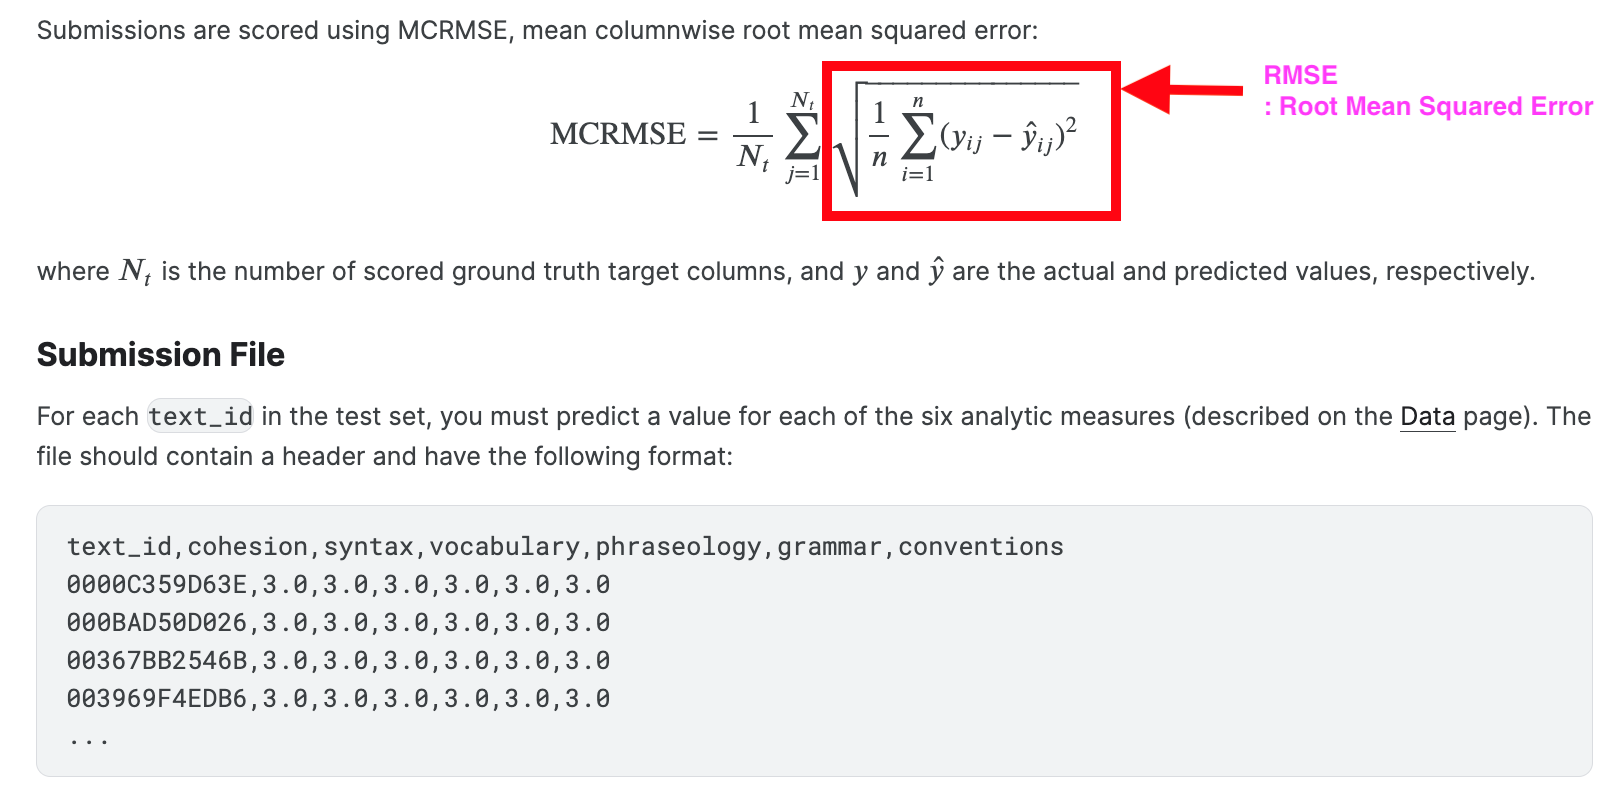


## Load and View Data

In [69]:
train_path = '/content/gdrive/MyDrive/Kaggle/train.csv'
test_path = '/content/gdrive/MyDrive/Kaggle/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Generally, the training and validation data set is split into an 80:20 ratio. Thus, 20% of the data is set aside for validation purposes. The ratio changes based on the size of the data.

In [70]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [71]:
test_df.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [80]:
# add new columns for aggregation: 'average_score', 'total_score', and 'total_score_in_perc'
# print(train_df.columns)
# cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

# row-wise aggregation
# total_points = 30
# train_df['avg_score'] = train_df[cols].mean(axis=1).round(1)
# train_df['total_score'] = train_df[cols].sum(axis=1)
# train_df['final_score_in_perc'] = (train_df[cols].sum(axis=1)/total_points*100).round(1)

# final_grades = []
# for score in train_df['final_score_in_perc']:
#   if score < 60:
#     final_grades.append('F')
#   elif score < 70:
#     final_grades.append('D')
#   elif score < 80:
#     final_grades.append('C')
#   elif score < 90:
#     final_grades.append('B')
#   elif score < 95:
#     final_grades.append('A')
#   else:
#     final_grades.append('A+')    
# print(final_grades)
# train_df['final_grade_letter'] = final_grades
# cat_cohesion = pd.cut(train_df['cohesion'],[1,2,3,4,5])
# train_df['cat_cohesion'] = cat_cohesion
# train_df['num_label_cohesion'] = train_df['cat_cohesion'].cat.codes
# train_df['str_label_cohesion'] = train_df.apply(lambda x: x['num_label_cohesion'])
# train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))
# train_df['cat_word_count'] = np.where(train_df['word_count'] < 500, 0, 1)        # 0 being 'low count' and 1 being 'high count'
# train_df[train_df.final_score_in_perc >= 90]

## Create a New Column, **word_count**

In [75]:
cols = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))

print("Stats for Word Count:")
corr_df = train_df[['full_text','word_count', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']].sort_values(by='word_count', ascending=False)
print((corr_df['word_count'].describe().round(1)).to_frame().T, '\n')
corr_df.head(10)

Stats for Word Count:
             count   mean    std   min    25%    50%    75%     max
word_count  3911.0  430.5  191.9  14.0  294.0  402.0  526.5  1260.0 



,full_text,word_count,cohesion,syntax,vocabulary,phraseology,grammar,conventions
725,Well the business that I want to visit is abou...,1260,3.5,2.5,3.0,3.5,2.5,2.5
1063,Success consist of going from failure to failu...,1240,3.0,2.5,3.0,2.5,3.0,2.5
2379,Generic_Name\n\nMarch 18 2019\n\nWritting SOL ...,1236,3.0,3.0,3.5,4.0,3.0,3.0
2297,It's a good idea for students to graduate of t...,1228,3.5,4.0,3.0,4.0,3.0,3.0
3434,In the years Thomas Jefferon be the President ...,1223,2.5,2.5,3.0,2.5,2.0,2.5
2789,science experiment on thing like chemical chan...,1209,1.5,1.0,2.0,2.0,1.5,1.5
50,I went to visit the manager of the Amazon comp...,1208,2.5,2.5,3.0,2.5,2.0,2.5
2804,Do you thing that most danger of us lies not s...,1205,3.0,3.5,3.0,3.0,3.5,3.5
1471,I agree with this prompt many cases it is impo...,1200,2.0,1.0,2.0,2.0,1.5,2.0
864,Do people ever told that having a positive att...,1193,3.0,4.0,4.0,3.0,3.0,3.0


## **Correlation** Study Between Word Count and Metrics

label_cols:
Index(['word_count', 'cohesion', 'syntax', 'vocabulary', 'phraseology',
       'grammar', 'conventions'],
      dtype='object')


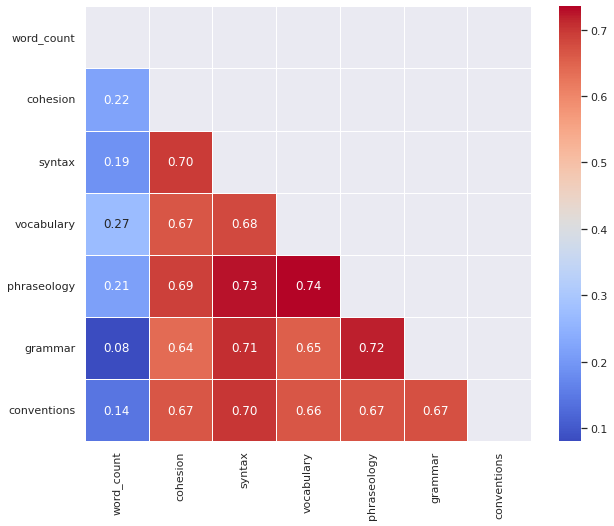

In [77]:
label_cols = corr_df.columns[1:]
print(f'label_cols:\n{label_cols}')
corr = train_df[label_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.set(rc = {"figure.figsize": (10, 8)})

sns.heatmap(corr, 
            annot = True, 
            cmap = "coolwarm", 
            mask = mask,
            linewidth=0.5,
            fmt  = ".2f")
plt.show()

There is no strong evidence of relationship between the 6 metrics and word count while vocab scores demo a bit higher assoication with the word count as expected.

## Check Unique Values in Each Metric

In [14]:
print('Unique Values in Each Metric:\n==================================================')
for col in cols:
  print(f'{col}: {train_df[col].unique()}')

Unique Values in Each Metric:
cohesion: [3.5 2.5 3.  4.5 4.  2.  1.  5.  1.5]
syntax: [3.5 2.5 4.5 3.  4.  2.  1.  1.5 5. ]
vocabulary: [3.  4.5 4.  3.5 2.5 2.  5.  1.5 1. ]
phraseology: [3.  2.  4.5 3.5 2.5 4.  5.  1.5 1. ]
grammar: [4.  2.  3.  2.5 3.5 4.5 5.  1.5 1. ]
conventions: [3.  2.5 5.  4.  2.  3.5 4.5 1.  1.5]


## Check the Shape of Train and Test Set

In [15]:
train_df.shape, test_df.shape

((3911, 13), (3, 2))

## Check Simple Stats/Data Type/Missing Values on Train and Test Set

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text_id              3911 non-null   object 
 1   full_text            3911 non-null   object 
 2   cohesion             3911 non-null   float64
 3   syntax               3911 non-null   float64
 4   vocabulary           3911 non-null   float64
 5   phraseology          3911 non-null   float64
 6   grammar              3911 non-null   float64
 7   conventions          3911 non-null   float64
 8   avg_score            3911 non-null   float64
 9   total_score          3911 non-null   float64
 10  final_score_in_perc  3911 non-null   float64
 11  word_count           3911 non-null   int64  
 12  cat_word_count       3911 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 397.3+ KB


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_id    3 non-null      object
 1   full_text  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [81]:
train_df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,430.492969
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,191.868449
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,294.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,402.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,526.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1260.000000


## Pull Only the 6 Metrics and Conduct **EDA**

In [91]:
label_cols = train_df.columns[2:-1]
label_cols

Index(['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar',
       'conventions'],
      dtype='object')

In [92]:
train_df[label_cols].drop_duplicates()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,3.5,3.5,3.0,3.0,4.0,3.0
1,2.5,2.5,3.0,2.0,2.0,2.5
2,3.0,3.5,3.0,3.0,3.0,2.5
3,4.5,4.5,4.5,4.5,4.0,5.0
4,2.5,3.0,3.0,3.0,2.5,2.5
...,...,...,...,...,...,...
3889,3.5,2.5,3.0,2.5,2.5,2.5
3896,2.0,3.0,3.0,2.5,2.0,2.0
3899,3.5,3.5,4.5,3.5,4.0,4.0
3904,2.5,2.0,2.5,1.5,2.0,2.0


In [93]:
train_df[label_cols].value_counts()

cohesion  syntax  vocabulary  phraseology  grammar  conventions
3.0       3.0     3.0         3.0          2.5      3.0            19
3.5       3.5     3.5         3.5          3.5      3.5            17
2.5       2.5     3.0         2.5          2.5      3.0            17
3.0       3.0     3.0         3.0          2.5      2.5            15
2.5       2.5     3.0         3.0          2.5      2.5            15
                                                                   ..
3.0       3.0     3.5         3.5          2.5      2.5             1
                              3.0          4.0      4.0             1
                                           3.0      2.0             1
                                           2.0      2.5             1
5.0       5.0     5.0         5.0          5.0      5.0             1
Length: 1768, dtype: int64

In [99]:
# essay with at least 97% total score
train_df[train_df[label_cols].sum(axis=1) > 29]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,word_count
258,12E3D52345C6,Technology has always acted as a compelling an...,5.0,5.0,5.0,5.0,4.5,5.0,651
1082,52DC3B7C3952,Working From Home\n\nShould students be allowe...,5.0,5.0,4.5,5.0,5.0,5.0,508
2389,B1AFACE6704E,I agree with Michelangelo's statement as I hav...,5.0,5.0,5.0,5.0,5.0,5.0,921


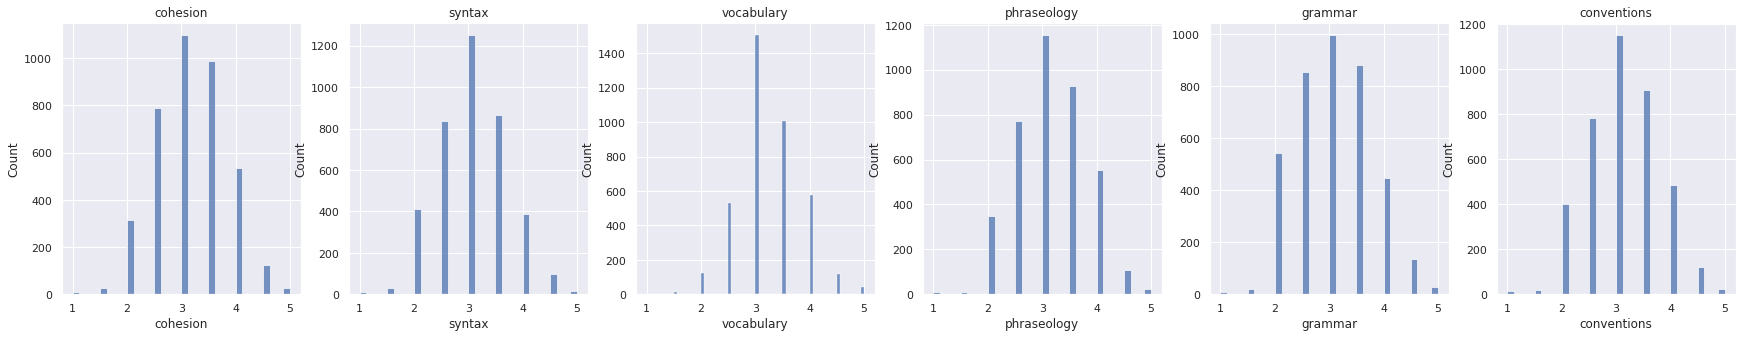

In [100]:
fig, ax = plt.subplots(1, len(label_cols), figsize=(30,5))

for idx, label in enumerate(label_cols):
    sns.histplot(x = label, 
                 data = train_df,
                 ax = ax[idx]
                )
    ax[idx].set_title(label)
    

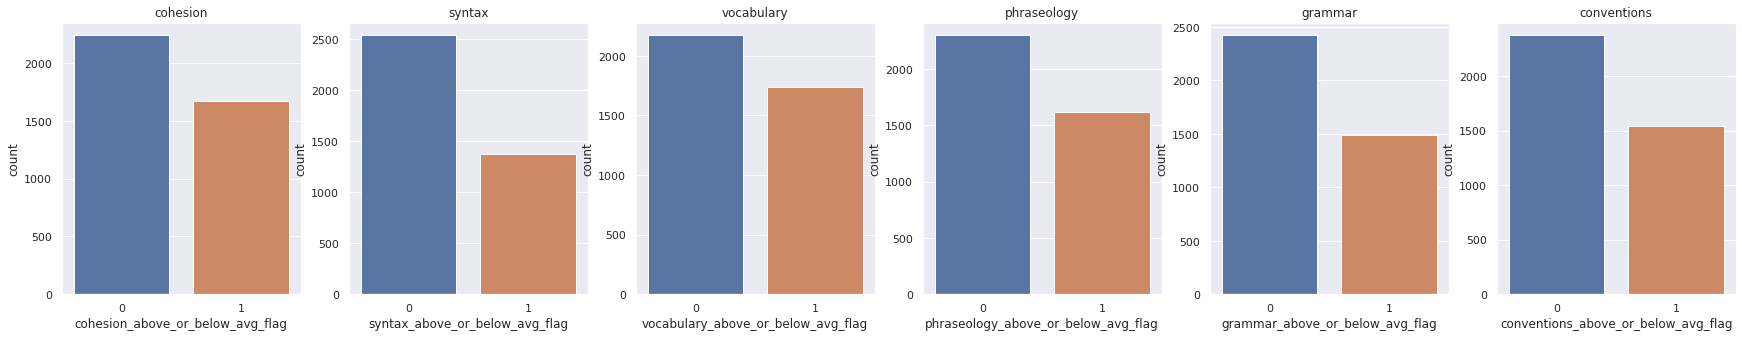

In [102]:
for label in label_cols:
    train_df[label + '_above_or_below_avg_flag'] = np.where(train_df[label] > np.mean(train_df[label]), 1, 0)   # 1 being greater than mean, 0 being lower than mean
    
fig, ax = plt.subplots(1, len(label_cols), figsize=(30,5))
for idx, label in enumerate(label_cols):
    sns.countplot(x = train_df[label + '_above_or_below_avg_flag'], ax = ax[idx])
    ax[idx].set_title(label)

In [114]:
first_essay = train_df['full_text'][0]
print(f'In the First Essay\n=====================================\nnum_words (tokens) = {len(first_essay.split())}\nnum_characters_in_first_essay = {len(first_essay)}')
print(f'Total score = {round(train_df[label_cols].sum(axis=1)[0])} out of 30\n=====================================')
# train_df[train_df[label_cols].sum(axis=1) > 29]
first_essay

In the First Essay
num_words (tokens) = 261
num_characters_in_first_essay = 1387
Total score = 20 out of 30


"I think that students would benefit from learning at home,because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home.\n\nThe hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. Then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear.\n\nmost students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go t

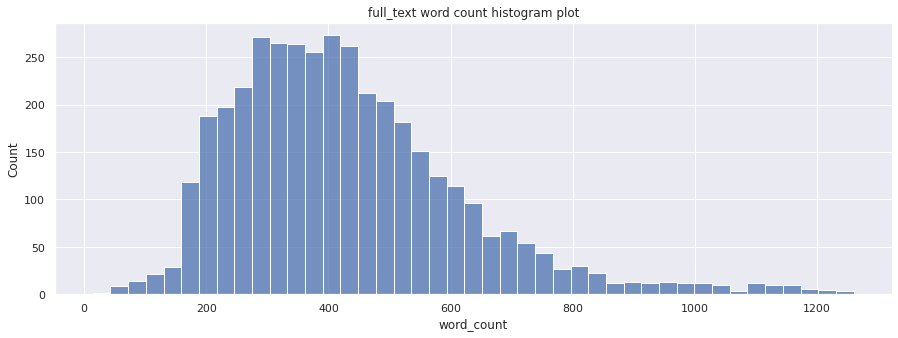

In [28]:
fig = plt.figure(figsize=(15, 5))
train_df['word_count'] = train_df['full_text'].apply(lambda x: len(x.split()))
sns.histplot(data = train_df, x = "word_count")
plt.title("full_text word count histogram plot")
plt.show()

WORD COUNT:
Min WC = 14
Max WC = 1260
Mean WC = 430
Median WC = 402
Mode WC = 343


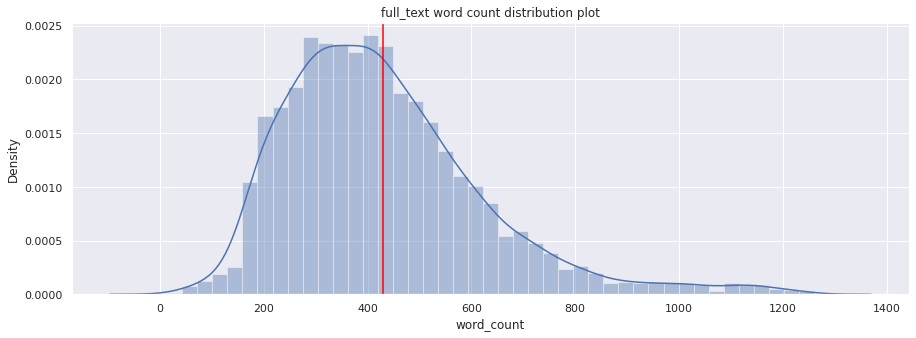

In [125]:
# mean > median
plt.figure(figsize = (15,5))
sns.distplot(train_df['word_count'])
plt.axvline(x = np.mean(train_df['word_count']), color = 'red')
plt.title('full_text word count distribution plot')

print(f'WORD COUNT:\n===============\nMin WC = {int(train_df["word_count"].min())}\nMax WC = {int(train_df["word_count"].max())}\nMean WC = {int(train_df["word_count"].mean())}\nMedian WC = {int(train_df["word_count"].median())}\nMode WC = {int(train_df["word_count"].mode())}')

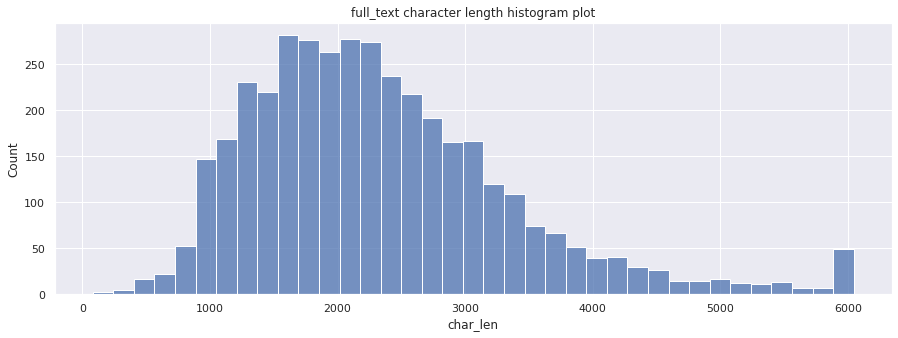

In [123]:
fig = plt.figure(figsize=(15, 5))
train_df['char_len'] = train_df['full_text'].apply(lambda x: len(x))
sns.histplot(data = train_df, x = "char_len")
plt.title("full_text character length histogram plot")
plt.show()

CHARACTER COUNT:
Min CC = 82
Max CC = 6044
Mean CC = 2334
Median CC = 2173
Mode CC = 1618


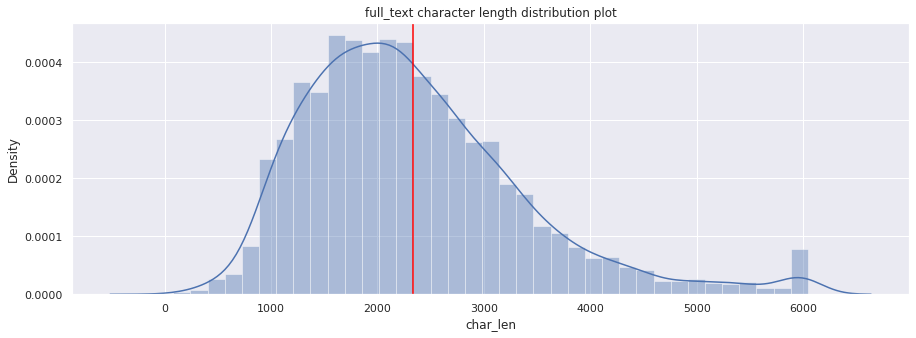

In [124]:
plt.figure(figsize = (15,5))
sns.distplot(train_df['char_len'])
plt.axvline(x = np.mean(train_df['char_len']), color = 'red')
plt.title('full_text character length distribution plot')
print(f'CHARACTER COUNT:\n===============\nMin CC = {int(train_df["char_len"].min())}\nMax CC = {int(train_df["char_len"].max())}\nMean CC = {int(train_df["char_len"].mean())}\nMedian CC = {int(train_df["char_len"].median())}\nMode CC = {int(train_df["char_len"].mode())}')

In [147]:
train_df[list(label_cols) + ['word_count', 'char_len']].describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0
word_count,3911.0,430.492969,191.868449,14.0,294.0,402.0,526.5,1260.0
char_len,3911.0,2334.522373,1033.406009,82.0,1597.0,2173.0,2866.5,6044.0


## The Most Occurring Words in the Top Essay with Perfect Score 30

Built-in STOPWORDS: {'our', 'am', 'about', 'again', 'had', 'herself', "can't", 'i', 'out', 'yourselves', 'com', "he's", "what's", 'under', 'my', 'ought', "why's", 'r', "hasn't", 'does', "they're", 'off', 'the', 'it', "they'd", 'with', "he'd", "aren't", 'why', 'his', "we'd", 'at', "we've", 'since', 'for', 'into', "when's", 'in', "weren't", "couldn't", 'has', 'do', 'there', "that's", 'against', 'yours', 'such', 'yourself', 'an', 'which', 'to', 'having', "it's", "she'd", 'therefore', "i'd", "we'll", 'he', 'they', 'is', "you'll", 'what', 'would', "i'm", 'further', 'like', 'http', "she'll", "we're", "wouldn't", 'we', 'should', 'hers', 'can', 'k', 'some', 'cannot', 'when', "i've", 'ours', 'also', 'just', 'being', 'get', 'as', "hadn't", 'but', 'their', 'otherwise', 'then', 'few', 'above', 'her', 'itself', 'whom', 'be', 'once', 'was', 'a', "she's", 'else', 'up', 'both', 'if', "i'll", 'of', 'theirs', 'that', "doesn't", "they'll", 'did', "isn't", "won't", 'are', "there's", "you've", "didn't", 'y

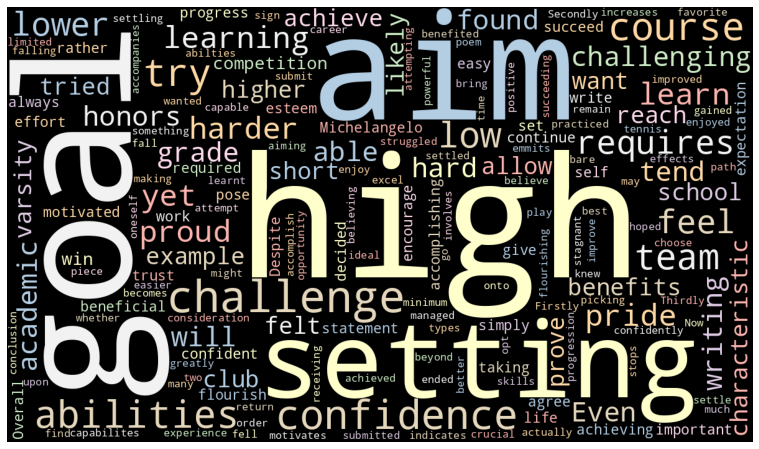

In [154]:
from wordcloud import WordCloud, STOPWORDS
print(f'Built-in STOPWORDS: {STOPWORDS}')

# The most occurring words excluding stopwords
text = train_df[train_df[label_cols].sum(axis=1)==30]['full_text'].values[0]
word_cloud = WordCloud(stopwords=STOPWORDS, colormap='Pastel1', collocations=False, width=1200, height=700, background_color = "black").generate(text)
plt.figure(figsize=(20,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## Build a Baseline BERT

In [155]:
#make it easier to use a variety of BERT subword models
model_checkpoint = 'bert-base-cased'   # case sensitive (care about upper and lower case)

In [156]:
from transformers import BertTokenizer, TFBertModel

bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)

In [157]:
train_texts = train_df['full_text']
train_texts

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object

In [158]:
# print(f'len(train_texts)={len(train_texts)} | type(train_texts)={type(train_texts)}')
train_texts = train_texts.values.tolist()
print(f'len(train_texts)={len(train_texts)} | type(train_texts)={type(train_texts)}')

len(train_texts)=3911 | type(train_texts)=<class 'list'>


In [159]:
max_length=500

In [41]:
# TODO from here
# print(f'len(train_texts) = {len(train_texts)}')
valid_texts = train_texts[16000:]
valid_labels = train_labels[16000:]     # set about 5% of the total training set to be validation set
train_texts = train_texts[:16000]
train_labels = train_labels[:16000]

print(f'len(valid_texts) = {len(valid_texts)}\nlen(valid_labels) = {len(valid_labels)}')
print(f'len(train_texts) = {len(train_labels)}\nlen(train_texts) = {len(train_labels)}')

NameError: ignored

In [ ]:
train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')

In [ ]:
print(f'len(train_encodings.input_ids[:1] = {len(train_encodings.input_ids[:1])}')
# Average length of sequences in essays = 2334



- 6 models for each score for 6 categories: ordinal logistic regression.
- seq to seq for multi-output model

**Natalie's comment:**<br>
1) build a classifier for each metric OR<br>
2) build a multi-label multi-class model where you set up 6 output classification layer with one input tokenized by BERT tokenizer (maybe use CLS token layer for our input layer)




In [ ]:
train_labels = np.arange(1,5.5,0.5)
print(train_labels)

In [ ]:
def create_simple_bert(checkpoint = model_checkpoint,
                       num_classes=9,   # [1, 1.5, 2, 2.5....4.5, 5]: 9 classes
                       hidden_size=201,
                       dropout=0.3,
                       learning_rate=0.00005,
                       max_length=500):
    """
    Build a simple classification model with BERT. Use the Pooler Output for classification purposes.
    """
    # =========== BEGIN generate "input features" using BERT tokenizer ==================================
    bert_model = TFBertModel.from_pretrained(checkpoint)                                              
    bert_model.trainable = False             # freeze all the pre-trained layers (no fine tuning)

    # input laber
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int64, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                   'token_type_ids': token_type_ids,
                   'attention_mask': attention_mask}
                   
    # Bert output: being used as an input feature in the classification model below
    bert_out = bert_model(bert_inputs)   # full features as an input to the following classification model
    # pooler_output = bert_out[1]    # one vector for each
    cls_token = bert_out[0][:, 0, :]    # give us a raw CLS tokens

    # =========== END generate "input features" using BERT tokenizer ==================================

    # =========== BEGIN build a "multi-classification model" below passing the BERT input features ======
    hidden = tf.keras.layers.Dense(hidden_size, activation='relu', name='hidden_layer')(cls_token)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)  

    # output classification layer
    classification = tf.keras.layers.Dense(num_classes, activation='softmax',name='classification_layer')(hidden)    
    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[classification])
    # =========== END build a "multi-classification model" below passing the BERT input features ======
    
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), 
                                 metrics='accuracy')                 # work for both string and integer based labels - if your data is imbalanced, you would want F1 score or BLUE for the text classification
                                #  metrics=tf.keras.metrics.SparseCategoricalAccuracy())    # only for the integer based labels
    return classification_model

- train_texts - an array of text strings for training
- test_texts - an array of text strings for testing
- valid texts - an array of text strings for validation
- train_labels - an array of integers representing the labels associated with train_texts
- test_labels - an array of integers representing the labels associated with test_texts
- valid_labels - an array of integers representing the labels associated with valid_texts
- target_names - an array of label strings that correspond to the integers in the *_labels arrays

In [ ]:
pooler_bert_model_history = pooler_bert_model.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask], 
                                                  train_labels,   
                                                  validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask], 
                                                  npvalid_labels),    
                                                  batch_size=8, 
                                                  epochs=1)  